# Name : Arun Kothari

# Importing the libraries:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Reding the CSV file:

In [2]:
df = pd.read_csv("Iris.csv")

- Dropping the id column.

In [3]:
df.drop(['Id'], axis=1, inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Replacing String to numerical values in species.

In [4]:
df.replace({'Iris-virginica':0,'Iris-versicolor':1,'Iris-setosa':2}, inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1:]

- Using DecisionTreeClassifier with GridSearchCV for hyper tunning.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree_para = {"random_state":[0], 'criterion':['gini','entropy'], "splitter" : ["best", "random"],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

clf = GridSearchCV(tree, tree_para, cv=5)
clf.fit(X, y)
result = pd.DataFrame(clf.cv_results_)

- Displaying the Scores of GridSearchCV.

In [6]:
result.sort_values('mean_test_score', ascending=False)[['param_splitter', 'param_criterion', 'param_max_depth', 'mean_test_score']].head(5)

,param_splitter,param_criterion,param_max_depth,mean_test_score
71,random,entropy,150,0.973333
15,random,gini,11,0.973333
35,random,gini,150,0.973333
31,random,gini,90,0.973333
29,random,gini,70,0.973333


# Visualzing the Tree using dtreeviz.

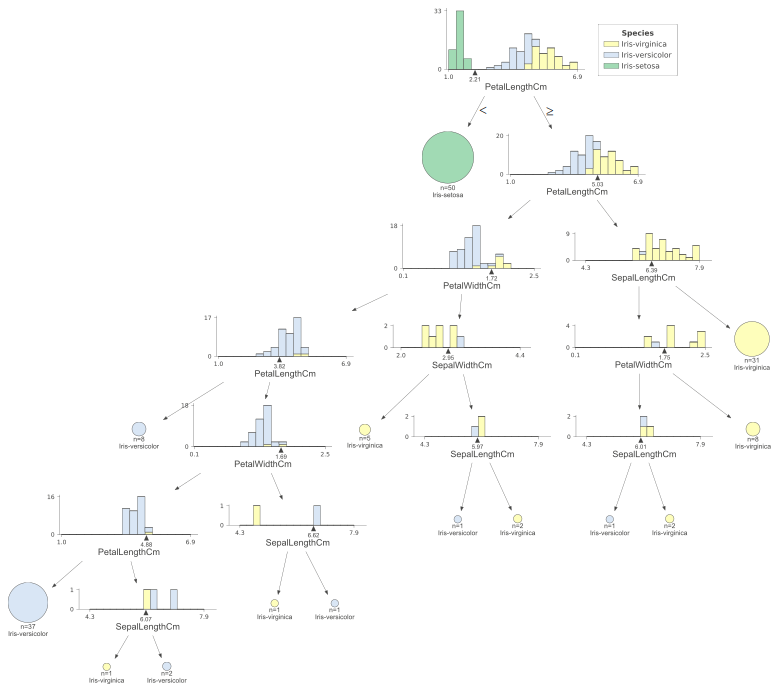

In [14]:
from dtreeviz.trees import dtreeviz
viz = dtreeviz(clf.best_estimator_, 
               df.iloc[:,:-1], 
               df.iloc[:, -1], 
               target_name='Species',
              feature_names=X.columns,
              class_names=['Iris-virginica','Iris-versicolor','Iris-setosa']
              )
viz

# PREDICTION:

In [55]:
print("ENTER VALUE IN CM")
SepalLength = float(input("SepalLength: "))
if (df["SepalLengthCm"].min()-1 > SepalLength or SepalLength > df["SepalLengthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["SepalLengthCm"].min()-1)+" and "+str(df["SepalLengthCm"].max()+1))

SepalWidth = float(input("SepalWidth: "))
if (df["SepalWidthCm"].min()-1 > SepalWidth or SepalWidth > df["SepalWidthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["SepalWidthCm"].min()-1)+" and "+str(df["SepalWidthCm"].max()+1))

PetalLength = float(input("PetalLength: "))
if (df["PetalLengthCm"].min()-1 > PetalLength or PetalLength > df["PetalLengthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["PetalLengthCm"].min()-1)+" and "+str(df["PetalLengthCm"].max()+1))

PetalWidth = float(input("PetalWidth: "))
if (df["PetalWidthCm"].min()-1 > PetalWidth or PetalWidth > df["PetalWidthCm"].max()+1):
    print("I highly dbout this value please check, must be in  range of "+str(df["PetalWidthCm"].min()-1)+" and "+str(df["PetalWidthCm"].max()+1))



ENTER VALUE IN CM
SepalLength: 1
I highly dbout this value please check, must be in  range of 3.3 and 8.9
SepalWidth: 2
PetalLength: 3
PetalWidth: 4
I highly dbout this value please check, must be in  range of -0.9 and 3.5


In [56]:
prediction = clf.best_estimator_.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])

In [57]:
print("The prediction is: ")

if prediction == 0:
    print("Iris-virginica")
elif prediction == 1:
    print('Iris-versicolor')
else:
    print('Iris-setosa')

The prediction is: 
Iris-virginica
